<a href="https://colab.research.google.com/github/devanomaly/tensorflow-stuff/blob/main/01_NN_regression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Regression with NNs in TF

In [1]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.8.0'

## Creating data to view and fit

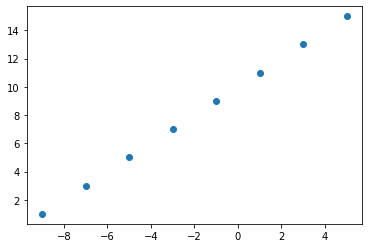

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-9., -7., -5., -3., -1., 1., 3., 5.])

y = np.array([1., 3., 5., 7., 9., 11., 13., 15.])
plt.scatter(X,y)

In [3]:
y == X + 10 # ideal case

array([ True,  True,  True,  True,  True,  True,  True,  True])

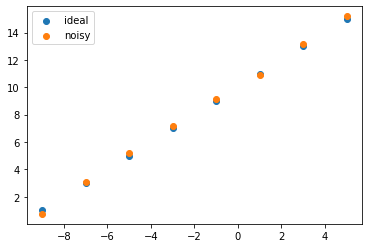

In [4]:
# Let's add some noise
new_y = y + np.random.uniform(-.5,.5,size=X.size)
plt.scatter(X,y, label="ideal")
plt.scatter(X,new_y,label="noisy")
plt.legend()
plt.show()


In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
tensor_X = tf.constant(X)
tensor_y = tf.constant(new_y)
tensor_X, tensor_y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-9., -7., -5., -3., -1.,  1.,  3.,  5.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=
 array([ 0.74753509,  3.10212614,  5.23168843,  7.16419692,  9.11687921,
        10.88606512, 13.15967764, 15.19003238])>)

## Steps in modelling with TensorFlow

1. **Create model** - define input, hidden and output layers
2. **Compile it** - define loss function, optimizer and evaluations metrics
3. Fit it - pass training data

In [12]:
# set random seed
tf.random.set_seed(42)
# 1. create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. compile it
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 810ms/step - loss: 9.2149 - mae: 9.2149
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 9.1649 - mae: 9.1649
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 9.1149 - mae: 9.1149
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 9.0649 - mae: 9.0649
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 9.0149 - mae: 9.0149


In [10]:
model.predict([5])

array([[11.630367]], dtype=float32)

In [11]:
model.evaluate(tensor_X, y)

1/1 [==============================] - 0s 405ms/step - loss: 1.7950 - mae: 1.7950


[1.7950420379638672, 1.7950420379638672]

### Let us improve the model
1. **Creating a model** - add more layers? increase the number of hidden units? change activation function?
2. **Compiling it** - change optimization function? learning rate?
3. **Fitting it** - more epochs? more data?

In [22]:
# set random seed
tf.random.set_seed(42)
# 1. create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. compile it
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
# 3. Fit the model (train for longer)
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 315ms/step - loss: 9.2149 - mae: 9.2149
Epoch 2/1200
1/1 [==============================] - 0s 9ms/step - loss: 9.1649 - mae: 9.1649
Epoch 3/1200
1/1 [==============================] - 0s 13ms/step - loss: 9.1149 - mae: 9.1149
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 9.0649 - mae: 9.0649
Epoch 5/1200
1/1 [==============================] - 0s 9ms/step - loss: 9.0149 - mae: 9.0149
Epoch 6/1200
1/1 [==============================] - 0s 8ms/step - loss: 8.9649 - mae: 8.9649
Epoch 7/1200
1/1 [==============================] - 0s 8ms/step - loss: 8.9149 - mae: 8.9149
Epoch 8/1200
1/1 [==============================] - 0s 10ms/step - loss: 8.8649 - mae: 8.8649
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 8.8149 - mae: 8.8149
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 8.7649 - mae: 8.7649
Epoch 11/1200
1/1 [==============================] - 0s 9ms/st

In [14]:
X, new_y

(array([-9., -7., -5., -3., -1.,  1.,  3.,  5.]),
 array([ 0.74753509,  3.10212614,  5.23168843,  7.16419692,  9.11687921,
        10.88606512, 13.15967764, 15.19003238]))

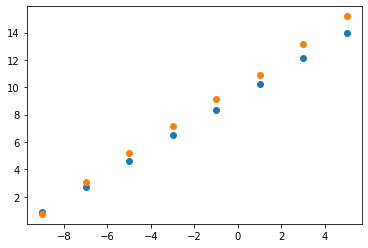

In [23]:
plt.scatter(X,model.predict([-9., -7., -5., -3., -1.,  1.,  3.,  5.]))
plt.scatter(X,new_y)

In [24]:
# set random seed
tf.random.set_seed(42)
# 1. create a model using the Sequential API
model = tf.keras.Sequential([
  # Add an extra hidden layer
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])
# 2. compile it
model.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
# 3. Fit the model 
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 903ms/step - loss: 7.5797 - mae: 7.5797
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 7.4906 - mae: 7.4906
Epoch 3/1200
1/1 [==============================] - 0s 12ms/step - loss: 7.4428 - mae: 7.4428
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 7.3948 - mae: 7.3948
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 7.3465 - mae: 7.3465
Epoch 6/1200
1/1 [==============================] - 0s 12ms/step - loss: 7.2981 - mae: 7.2981
Epoch 7/1200
1/1 [==============================] - 0s 9ms/step - loss: 7.2496 - mae: 7.2496
Epoch 8/1200
1/1 [==============================] - 0s 18ms/step - loss: 7.2010 - mae: 7.2010
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 7.1523 - mae: 7.1523
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 7.1034 - mae: 7.1034
Epoch 11/1200
1/1 [==============================] - 0s 10m

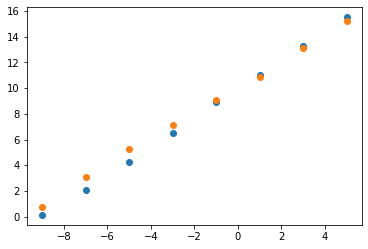

In [25]:
plt.scatter(X,model.predict([-9., -7., -5., -3., -1.,  1.,  3.,  5.]))
plt.scatter(X,new_y)

In [26]:
# set random seed
tf.random.set_seed(42)
# 1. create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])
# 2. compile it
model.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
# 3. Fit the model (less epochs)
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 581ms/step - loss: 7.5797 - mae: 7.5797
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 7.4906 - mae: 7.4906
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 7.4428 - mae: 7.4428
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 7.3948 - mae: 7.3948
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 7.3465 - mae: 7.3465
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 7.2981 - mae: 7.2981
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 7.2496 - mae: 7.2496
Epoch 8/500
1/1 [==============================] - 0s 20ms/step - loss: 7.2010 - mae: 7.2010
Epoch 9/500
1/1 [==============================] - 0s 20ms/step - loss: 7.1523 - mae: 7.1523
Epoch 10/500
1/1 [==============================] - 0s 18ms/step - loss: 7.1034 - mae: 7.1034
Epoch 11/500
1/1 [==============================] - 0s 15ms/step - l

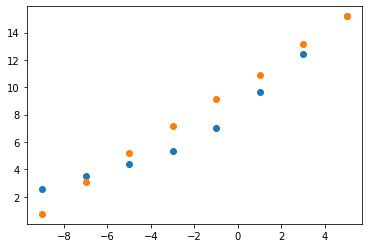

In [27]:
plt.scatter(X,model.predict([-9., -7., -5., -3., -1.,  1.,  3.,  5.]))
plt.scatter(X,new_y)

In [30]:
# set random seed
tf.random.set_seed(42)
# 1. create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1)
])
# 2. compile it
model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=["mae"])
# 3. Fit the model (less epochs)
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 763ms/step - loss: 7.4635 - mae: 7.4635
Epoch 2/200
1/1 [==============================] - 0s 17ms/step - loss: 7.2550 - mae: 7.2550
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 7.0458 - mae: 7.0458
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 6.8360 - mae: 6.8360
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 6.6939 - mae: 6.6939
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 6.5848 - mae: 6.5848
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 6.4498 - mae: 6.4498
Epoch 8/200
1/1 [==============================] - 0s 12ms/step - loss: 6.2949 - mae: 6.2949
Epoch 9/200
1/1 [==============================] - 0s 15ms/step - loss: 6.1239 - mae: 6.1239
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 5.9401 - mae: 5.9401
Epoch 11/200
1/1 [==============================] - 0s 17ms/step - loss: 5.7454 -

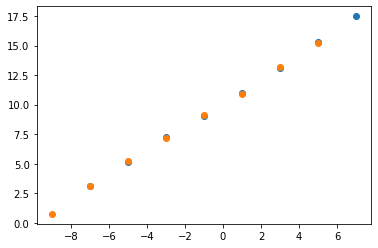

In [36]:
plt.scatter([-7., -5., -3., -1.,  1.,  3.,  5., 7], model.predict([-7., -5., -3., -1.,  1.,  3.,  5., 7]))
plt.scatter(tensor_X,new_y)